In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
###### Analytic solution

def analytic_oscilator_x(t):
    
    return x_0*np.cos(w_0*t) + (v_0/w_0) * np.sin(w_0*t)

def analytic_oscilator_v(t):
    
    return -x_0*w_0*np.sin(w_0*t) + v_0*np.cos(w_0*t)

In [3]:
k = 1
m = 1
x_0 = 0.1
v_0 = 0
w_0 = np.sqrt(k/m)
E_0 = 0.5*k*x_0**2 + 0.5*m*v_0**2

In [4]:
ti = 0
tf = 5*(2*np.pi/w_0)

In [5]:
######  Euler’s method
NE = 10000
N = NE
h = (tf-ti)/(N)


x_tE = [x_0]
v_tE = [v_0]
E_tE = []

for i in range (0,N-1):
    x_tE.append(x_tE[i] + h*v_tE[i])
    v_tE.append(v_tE[i] + h*(-w_0**2 * x_tE[i]))
    E_tE.append(0.5*k*x_tE[i]**2 + 0.5*m*v_tE[i]**2)
    
E_tE.append(0.5*k*x_tE[N-1]**2 + 0.5*m*v_tE[N-1]**2)    
    
t = np.linspace(ti,tf,N)

In [6]:
###### RK4 method
N = 10000
h = (tf-ti)/(N)

x_t = [x_0]
v_t = [v_0]
E_t = []

for i in range (0,N-1):
    k1x = h*v_t[i]
    k2x = h*(v_t[i] + h/2 * (-w_0**2 * x_t[i]))
    k3x = h*(v_t[i] + h/2 * (-w_0**2 * x_t[i]))
    k4x = h*(v_t[i] + h * (-w_0**2 * x_t[i]))
    
    x_t.append(x_t[i] + 1/6 *(k1x + 2*k2x + 2*k3x +k4x))
    
    k1v = h*(-w_0**2 * x_t[i])
    k2v = h*(-w_0**2 * x_t[i] + h/2 * (-w_0**2 * v_t[i]))
    k3v = h*(-w_0**2 * x_t[i] + h/2 * (-w_0**2 * v_t[i]))
    k4v = h*(-w_0**2 * x_t[i] + h * (-w_0**2 * v_t[i]))
    
    
    v_t.append(v_t[i] + 1/6 *(k1v + 2*k2v + 2*k3v +k4v))
    
    E_t.append(0.5*k*x_t[i]**2 + 0.5*m*v_t[i]**2)
    
    
E_t.append(0.5*k*x_t[N-1]**2 + 0.5*m*v_t[N-1]**2)    
    
t = np.linspace(ti,tf,N)

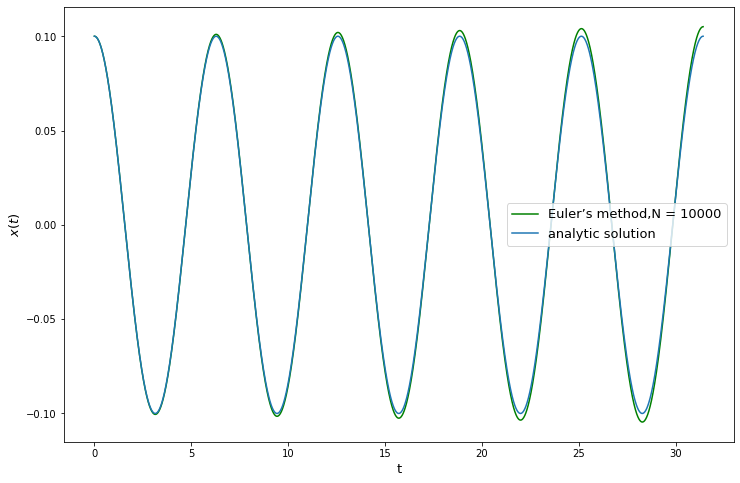

In [17]:
plt.plot(t,x_tE,color='green',label='Euler’s method,N = %d' %NE) 
plt.plot(t,analytic_oscilator_x(t),label='analytic solution')  


plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$x (t)$',fontsize='13')
plt.legend(fontsize=13)

In [7]:
plt.rcParams['figure.figsize'] = [12,8]

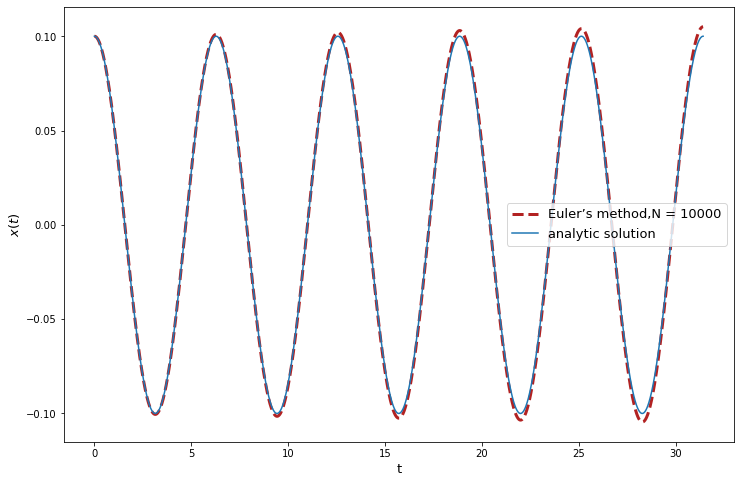

In [8]:
plt.plot(t,x_tE,color='firebrick',ls='--',lw=3,label='Euler’s method,N = %d' %NE) 
plt.plot(t,analytic_oscilator_x(t),label='analytic solution')  


plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$x (t)$',fontsize='13')
plt.legend(fontsize=13)

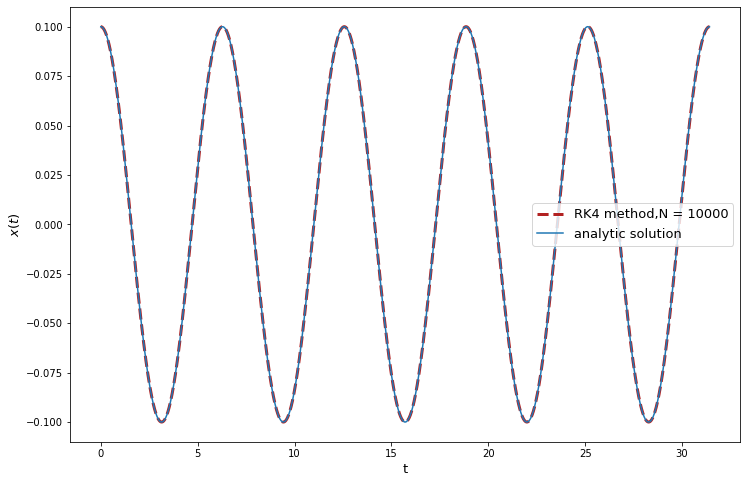

In [9]:
plt.plot(t,x_t,color='firebrick',ls='--',lw=3,label='RK4 method,N = %d' %N) 
plt.plot(t,analytic_oscilator_x(t),label='analytic solution')  


plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$x (t)$',fontsize='13')
plt.legend(fontsize=13)

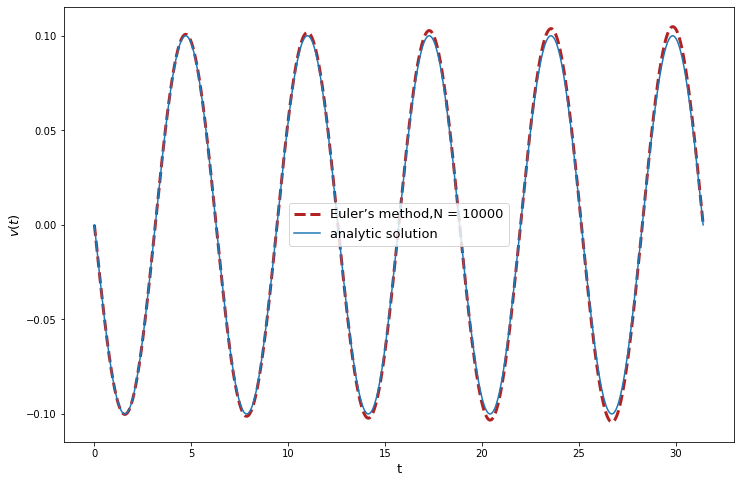

In [10]:
plt.plot(t,v_tE,color='firebrick',ls='--',lw=3,label='Euler’s method,N = %d' %NE)  
plt.plot(t,analytic_oscilator_v(t),label='analytic solution')  

plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$v (t)$',fontsize='13')
plt.legend(fontsize=13)

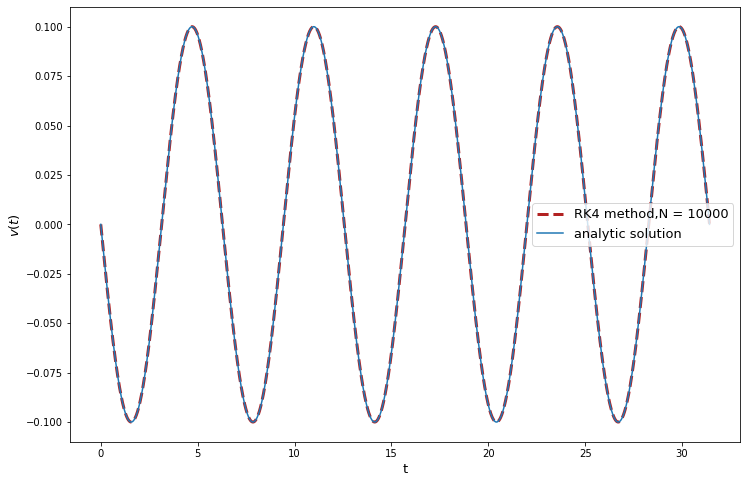

In [11]:
plt.plot(t,v_t,color='firebrick',ls='--',lw=3,label='RK4 method,N = %d' %N) 
plt.plot(t,analytic_oscilator_v(t),label='analytic solution')  


plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$v (t)$',fontsize='13')
plt.legend(fontsize=13)

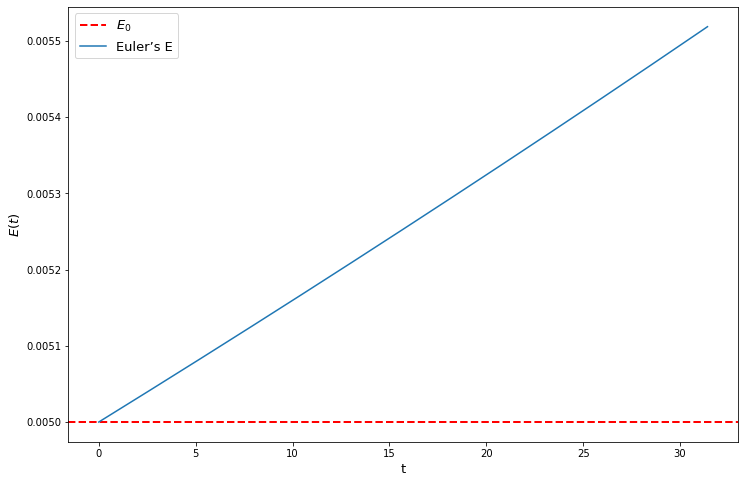

In [12]:
plt.axhline(y=E_0,linewidth=2,ls='--',color='red',label=r'$E_0$')
plt.plot(t,E_tE,label='Euler’s E') 
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$E(t)$',fontsize='13')
plt.legend(fontsize=13)
plt.ticklabel_format(useOffset=False)

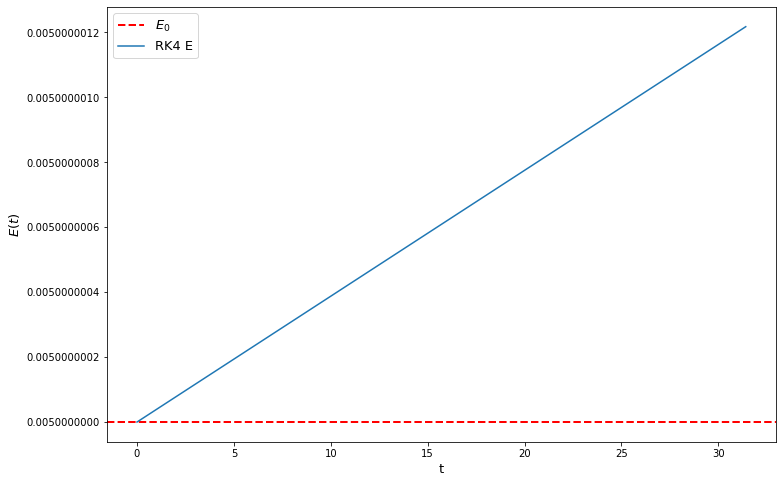

In [13]:
plt.axhline(y=E_0,linewidth=2,ls='--',color='red',label=r'$E_0$')
plt.plot(t,E_t,label='RK4 E')
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$E(t)$',fontsize='13')
plt.legend(fontsize=13)
plt.ticklabel_format(useOffset=False)

In [14]:
E_t

[0.005000000000000001,
 0.005000000000121763,
 0.005000000000243523,
 0.005000000000365284,
 0.005000000000487045,
 0.005000000000608808,
 0.0050000000007305685,
 0.0050000000008523305,
 0.005000000000974092,
 0.0050000000010958535,
 0.005000000001217615,
 0.005000000001339376,
 0.005000000001461136,
 0.005000000001582899,
 0.00500000000170466,
 0.00500000000182642,
 0.005000000001948182,
 0.005000000002069943,
 0.005000000002191704,
 0.005000000002313466,
 0.005000000002435227,
 0.005000000002556989,
 0.00500000000267875,
 0.005000000002800512,
 0.005000000002922273,
 0.005000000003044035,
 0.005000000003165796,
 0.005000000003287558,
 0.005000000003409318,
 0.00500000000353108,
 0.005000000003652842,
 0.005000000003774603,
 0.005000000003896364,
 0.005000000004018125,
 0.005000000004139887,
 0.005000000004261648,
 0.00500000000438341,
 0.0050000000045051715,
 0.005000000004626933,
 0.005000000004748694,
 0.005000000004870456,
 0.005000000004992216,
 0.005000000005113977,
 0.005000000

In [15]:
E_t[9999]

0.005000001217491992

In [16]:
E_tE[9999]

0.005518596660774781

As it can be seen with graphs and energy values, RK4 method is far superior to Euler’s method. Euler's method can achieve  similar accuracy to RK4 method if it has N that is a thousand times bigger, which in turn means that calculation will take longer. Of course, it is no wonder that RK4 method will give better results since it is more accurately calculating the slopes at each point, giving it quartically smaller error with reduced step size instead of linearly reduced error.